In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("data/pt/dev.tsv", sep='\t')

In [34]:
df.head(15)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27030949.mp3,6b71905bea95cbd18c518819ab645b1faa5ebe58607792...,"Camilo estremeceu, tinha medo:",NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
1,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27030950.mp3,813e2d6269335b098168bfd6b9c672fe200ff3bbf46671...,Eu vi mamãe Oxum na cachoeira sentada na beira...,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
2,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27030953.mp3,79fce9323a743569857cddd5a42478e4ed2fcf0c4b9065...,Vire de vez em quando.,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
3,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031030.mp3,70d571668c69bd4570b05fdd058c3c18894cec38ad6251...,Agronômica,NaN,3,0,NaN,NaN,NaN,NaN,pt,NaN
4,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031031.mp3,7af4ca9334d6f973447b109579b339ab0589a537885311...,Temos que procurar um modelo alternativo e con...,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
5,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031032.mp3,7263a5d133e97ba526da34d861951f002d837496b2a198...,Esmagar a gaiola se o porto te chama.,NaN,2,1,NaN,NaN,NaN,NaN,pt,NaN
6,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031033.mp3,8d157aa6537a7b410fa7cfb947652f09c3e07808d26758...,E foi a bordo recebê-lo.,NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
7,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031034.mp3,769a5c750055ce8eddaaad3453a5e1031acd4f78121a12...,"Por gentileza, leia as notícias do dia",NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
8,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031076.mp3,84f26e72782d21bc2a1a3a003538a9aad3b1962e45aa31...,"Na metade do cozimento, adicione o alho picado...",NaN,2,0,NaN,NaN,NaN,NaN,pt,NaN
9,1e77eb320c1d9a1bf849734c4817d11fdabffc603c3e46...,common_voice_pt_27031078.mp3,868f8f82b02616898ee543817bae40dd6fc23a386b0ab0...,O espartilho apertou-o.,NaN,3,2,NaN,NaN,NaN,NaN,pt,NaN


In [35]:
#pip install librosa

In [36]:
import librosa

audio, sr = librosa.load("data/pt/clips/common_voice_pt_27030949.mp3", sr=16000, mono=True)
audio = audio / max(abs(audio))

In [37]:
from IPython.display import Audio, display

display(Audio(audio, rate=16000))

* Embeddings com silêncio tendem a ficar “puxados” para regiões comuns do espaço vetorial.

In [38]:
#pip install silero-vad

In [39]:
import torch
from silero_vad import get_speech_timestamps, load_silero_vad

def remove_silence(audio, sampling_rate=16000):
    audio = torch.tensor(audio, dtype=torch.float32)
    model = load_silero_vad()
    timestamps = get_speech_timestamps(audio, model, sampling_rate=sampling_rate)
    if len(timestamps) == 0:
        return audio.numpy()
    speech_audio = torch.cat([audio[t["start"]:t["end"]] for t in timestamps])
    return speech_audio.numpy()


In [40]:
def truncate(audio, sr=16000, duration=3):
    max_len = sr * duration  # 2 segundos

    if len(audio) < max_len:
        return False, audio   

    return True, audio[:max_len]  # áudio válido e truncado

In [41]:
def pre_emphasis(signal, alpha=0.97):
    return np.append(signal[0], signal[1:] - alpha * signal[:-1])

In [42]:
def pre_process_speech(audio):
    audio, _ = librosa.effects.trim(audio, top_db=20)
    audio = pre_emphasis(audio)
    audio = audio / max(abs(audio))
    is_valid ,audio = truncate(audio)
    return is_valid, audio 

In [43]:
is_valid, processed_speech = pre_process_speech(audio)
if is_valid:
    display(Audio(processed_speech, rate=16000))

In [44]:
import librosa

X = []
y = []

for _, row in df[0:160].iterrows():
    audio, sr = librosa.load("data/pt/clips/"+row['path'], sr=16000)
    is_valid, audio = pre_process_speech(audio)
    if is_valid:
        X.append(audio)        
        y.append(row['client_id'][:5])    # label do locutor


In [45]:
from collections import defaultdict

speaker_audios = defaultdict(list)

for _, row in df[0:100].iterrows():
    audio, sr = librosa.load("data/pt/clips/" + row['path'], sr=16000)
    is_valid, audio = pre_process_speech(audio)

    if is_valid:
        speaker_id = row['client_id'][:5]
        speaker_audios[speaker_id].append(audio)


In [46]:
speaker_audios.keys()

dict_keys(['1e77e', '1fe56', '2a1c6', '2e30c', '30860', '342eb', '345f8', '3f96e'])

In [47]:
def extract_mfcc(audio, sr=16000, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfcc = mfcc.T  # (frames, features)
    return mfcc

In [48]:
def extract_mfcc(audio):
    n_mfcc = 13
    frame_length = int(0.025 * sr)   
    hop_length = int(0.010 * sr)     

    mfcc = librosa.feature.mfcc(
        y=audio,
        sr=sr,
        n_mfcc=n_mfcc,
        n_fft=frame_length,
        hop_length=hop_length,
        n_mels=26
    )
    return mfcc

In [49]:
speaker_id = '342eb'
audios = speaker_audios[speaker_id]

audios_marcelo = []
audio, sr = librosa.load("tests/a.ogg", sr=16000, mono=True)
_,audio = pre_process_speech(audio)
audios_marcelo.append((audio))
audio, sr = librosa.load("tests/b.ogg", sr=16000, mono=True)
_,audio = pre_process_speech(audio)
audios_marcelo.append((audio))


mfccs = [extract_mfcc(audio) for audio in audios]
test = mfccs[0]
mfccs = mfccs[:]

X_speaker = np.hstack(mfccs) 
X_speaker.shape

(13, 602)

In [50]:
mean = X_speaker.mean(axis=1)   # (D,)
std  = X_speaker.std(axis=1)    # (D,)

X_speaker_norm = (X_speaker.T - mean) / (std + 1e-8)

In [51]:
mean.shape

(13,)

In [52]:
C = np.cov(X_speaker_norm.T)
C.shape

(13, 13)

In [53]:
np.mean(X_speaker_norm[-1])

0.0054867086

In [54]:
cond = np.linalg.cond(C)
cond

12.740131062812988

In [55]:
C

array([[ 1.00166393, -0.12827115, -0.26673815,  0.15192957, -0.20060964,
        -0.1764266 , -0.21185075, -0.04307515, -0.28907003,  0.09381346,
        -0.30502098,  0.02514267, -0.2226151 ],
       [-0.12827115,  1.00166394, -0.52680317, -0.22922467, -0.2858883 ,
        -0.1571026 ,  0.04965874, -0.3191017 , -0.21827518,  0.19074516,
         0.17594571, -0.17334156, -0.12896475],
       [-0.26673815, -0.52680317,  1.00166402,  0.04377746,  0.19201954,
        -0.0139919 ,  0.15502584,  0.33135834,  0.13982774, -0.33278542,
        -0.00162487, -0.10504716,  0.08573518],
       [ 0.15192957, -0.22922467,  0.04377746,  1.00166394,  0.0016547 ,
        -0.29846742,  0.3415551 , -0.00151359, -0.15374835, -0.37905302,
        -0.229314  , -0.00357038, -0.39950978],
       [-0.20060964, -0.2858883 ,  0.19201954,  0.0016547 ,  1.00166403,
         0.20666949, -0.22408792,  0.27625169,  0.02827808, -0.1532048 ,
        -0.0439298 , -0.08274067,  0.28317403],
       [-0.1764266 , -0.157102

In [56]:
np.mean( X_speaker_norm[0])

-0.33353952

In [57]:
invC = np.linalg.inv(C)

distances_by_speaker = {}   # <-- média final por locutor

for spk, audios in speaker_audios.items():

    if spk == speaker_id:
        print("locutor de referência:", spk)
        # continue  # deixe comentado se quiser analisar ele também

    speaker_dists = []  # <-- acumula distâncias dos áudios desse locutor

    for audio in audios:

        X_mfcc = extract_mfcc(audio).T      # (frames, 13)
        X_mfcc = (X_mfcc - mean) / std

        dsts = []
        for i in range(X_mfcc.shape[0]):
            diff = X_mfcc[i]
            dist = diff.T @ invC @ diff
            dsts.append(dist)

        speaker_dists.append(np.median(dsts))

    # média das distâncias desse locutor
    mean_dist = np.median(speaker_dists)
    distances_by_speaker[spk] = mean_dist

    print("Distância média:", mean_dist/11, " | locutor:", spk)


Distância média: 7.0587022504600245  | locutor: 1e77e
Distância média: 3.0845746456662892  | locutor: 1fe56
Distância média: 2.864887996048049  | locutor: 2a1c6
Distância média: 3.5578767540136984  | locutor: 2e30c
Distância média: 5.03351130332561  | locutor: 30860
locutor de referência: 342eb
Distância média: 1.0900231607709265  | locutor: 342eb
Distância média: 3.554751799500217  | locutor: 345f8
Distância média: 3.3653628898483046  | locutor: 3f96e


Distâncias (self): [58.7669130580481, 57.082904015565774, 55.23951743231263, 68.35180187406992, 65.60635066236271, 71.30660804959824, 41.869490578383704, 48.730750375736584]
Média: 58.36929200575971
Mediana: 57.92490853680694
Máximo: 71.30660804959824


(array([1., 0., 1., 0., 1., 2., 0., 0., 2., 1.]),
 array([41.86949058, 44.81320233, 47.75691407, 50.70062582, 53.64433757,
        56.58804931, 59.53176106, 62.47547281, 65.41918456, 68.3628963 ,
        71.30660805]),
 <BarContainer object of 10 artists>)

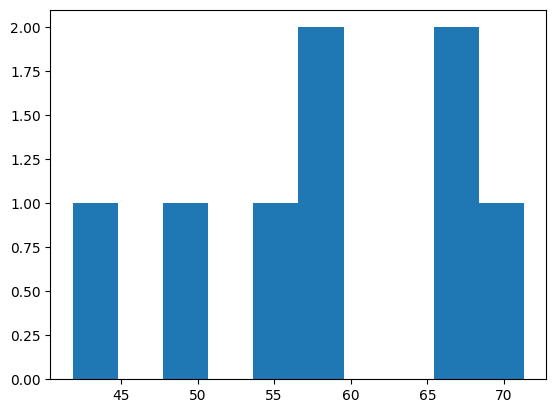

In [58]:
import numpy as np
import matplotlib.pyplot as plt


self_distances = []

for audio in audios:

    X_mfcc = extract_mfcc(audio)
    X_mfcc = (X_mfcc.T - mean) / std

    frame_dists = []
    for i in range(X_mfcc.shape[0]):
        diff = X_mfcc[i]
        dist = diff.T @ invC @ diff
        frame_dists.append(dist)

    self_distances.append(np.mean(frame_dists))

# === RESULTADOS NUMÉRICOS ===
print("Distâncias (self):", self_distances)
print("Média:", np.mean(self_distances))
print("Mediana:", np.median(self_distances))
print("Máximo:", np.max(self_distances))
plt.hist(self_distances)


In [59]:
import numpy as np
import matplotlib.pyplot as plt

all_distances = {}   # {spk: [dist_audio1, dist_audio2, ...]}

for spk, audios_spk in speaker_audios.items():

    speaker_dists = []

    for audio in audios_spk:

        X_mfcc = extract_mfcc(audio)
        X_mfcc = (X_mfcc.T - mean) / std   # normaliza com stats do locutor referência

        frame_dists = []
        for i in range(X_mfcc.shape[0]):
            diff = X_mfcc[i]
            dist = diff.T @ invC @ diff
            frame_dists.append(dist)

        speaker_dists.append(np.mean(frame_dists))

    all_distances[spk] = speaker_dists

    print(
        f"Locutor {spk} | "
        f"média={np.mean(speaker_dists):.3f} | "
        f"mediana={np.median(speaker_dists):.3f}"
    )


Locutor 1e77e | média=90.334 | mediana=91.137
Locutor 1fe56 | média=37.941 | mediana=38.084
Locutor 2a1c6 | média=41.412 | mediana=40.651
Locutor 2e30c | média=49.852 | mediana=49.852
Locutor 30860 | média=69.582 | mediana=60.959
Locutor 342eb | média=12.978 | mediana=12.978
Locutor 345f8 | média=46.456 | mediana=45.742
Locutor 3f96e | média=58.369 | mediana=57.925


In [60]:
X_mfcc =  extract_mfcc(audio).T #X_speaker_norm[-1]
X_mfcc = (X_mfcc-mean)/std
distances = []
for i in range(X_mfcc.shape[0]):
   
    #X_mfcc[:, i]
    diff = X_mfcc[i] - np.zeros(13)
    dist = (diff.T @ np.linalg.inv(C) @ diff)
    distances.append(dist)

total_dist = np.median(distances)
print(total_dist/11)

2.853318267851041


(array([89., 98., 32., 32., 10., 11., 15.,  5.,  3.,  6.]),
 array([  6.00156645,  24.0504504 ,  42.09933435,  60.1482183 ,
         78.19710225,  96.2459862 , 114.29487016, 132.34375411,
        150.39263806, 168.44152201, 186.49040596]),
 <BarContainer object of 10 artists>)

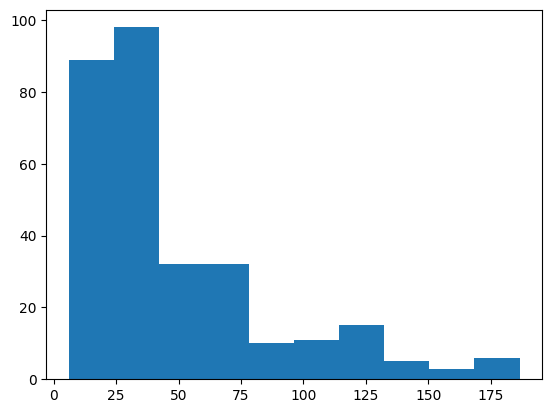

In [61]:
plt.hist(distances)

In [62]:
import librosa

audio, sr = librosa.load("tests/fefa_3.ogg", sr=16000, mono=True)
is_valid,audio = pre_process_speech(audio)
if is_valid:
    display(Audio(audio, rate=16000))